## Normal and Inferior Goods

#### Definition of Normal/Inferior Goods
Consider a utility maximization problem: $\max_{x,y} u(x,y)$ s.t. $p_xx+p_yy \leq I$, and let the solution of the problem (i.e., Marshallian demand) as $x(p_x,p_y,I)$ and $y(p_x,p_y,I)$. 
* If $\frac{\partial x(p_x,p_y,I)}{\partial I}>0$, then the good x is a normal good.
* If $\frac{\partial x(p_x,p_y,I)}{\partial I}<0$, then the good x is an inferior good.


In the following, I plot examples of normal/inferior goods. 
Here, I focus on the following class of utility function: $u(x, y) = x^a/a + y^b/b$. 

It is worthnoting that this becomes 
* a CES utility function if $a=b<1$, and 
* a quasi-linear utility if b=1 (or a=1). 

Since there is no income effect under a quasi-linear utility function (i.e., $\frac{\partial x(p_x,p_y,I)}{\partial I}=0$ since all the income effect is absorved by change in y if $b=1$), we can guess that we can let x as an inferior good by setting b>1. 

First, I plot indifference curves of the utility function with $a<1$ and $b>1$. 

In [1]:
# Preparing graphs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline

l1 = 0.0001
u1 = 3.5
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

In [2]:
def utl3(x1, x2, a, b):
    return (x1**a)/a + (x2**b)/b

def MRS3(x1, x2, a, b):
    return (x1**(a-1))/(x2**(b-1))

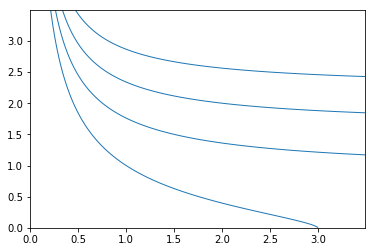

In [3]:
V3 = utl3(X1, X2, -1, 1.5)
plt.figure()
x = np.arange(1, 3, 0.5)
plt.contour(X1, X2, V3, levels = utl3(x, x, -1, 1.5), linewidths = 1, colors = 'C0', linestyles='solid');

It is still hard to see whether this represents inferior goods. Therefore, I derive the Marshallian demand along with corresponding budget constraints. In order to do that, I solve the following system of equations: 
\begin{align*}
(MRS=)\frac{x^{a-1}}{y^{b-1}} &=\frac{p_x}{p_x} \\ 
p_xx+p_yy &= I
\end{align*}
where the first equation is the tangency condition and the second equation is the budget constraint. 

In [4]:
def FOC_max(x):
    # parameters are passed like as global variables
    val = np.empty((2)) # We need to specify 'val' as an array, but not a list.
    val[0] = (x[0]**(a-1))/ (x[1]**(b-1)) - slp
    val[1] = IoverPy -  slp*x[0] - x[1]
    return val

Here, I use `fsolve` to solve the system of equation defined above. 
* Note: Parameters are passed even without explicitly defining them as global variables.

In [5]:
a = -1
slp = 1
b = 1
IoverPy = 2

res = fsolve(FOC_max, np.array([float(1),float(1)] )) 
# The initial value must be a np.arrray, not a list. 
# Without making the initial value as a floating point number,
# you will see an error message related to a power in the function 
res

array([ 1.,  1.])

In the following, I calculate the optimal consumption bundle for different levels of b and different levels of I, and draw the indifference curves corresponding to each optimal consumption bundle. 

#### Overview of the following part 
    for each b  
        for each I (income level)  
            solve system of equation and plot the point  
        end  
        plot contours  
    end

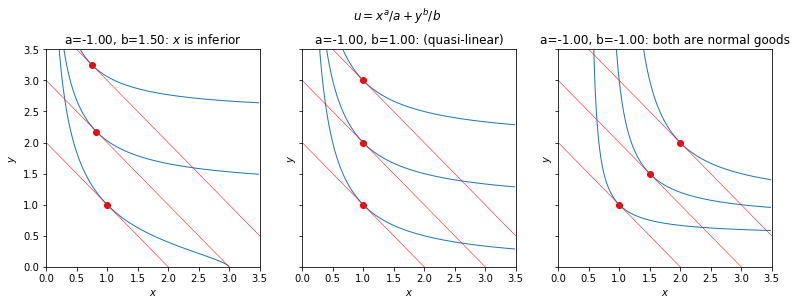

In [10]:
a = -1
slp = 1
bs = [1.5, 1, -1] # Different b's are defined to iterate through them in the following for-loop. 


fig, axes = plt.subplots(1,3,figsize=(13, 4),
                         sharex= True, #sharing x axis properties such as xlim, xticks
                         sharey= True) #sharing y axis 

ttls = [r'$x$ is inferior', '(quasi-linear)', 'both are normal goods']

plt.suptitle(r'$u=x^a/a + y^b/b$', va = 'baseline')
for b, ax, ttl in zip(bs, axes, ttls):
    plt.sca(ax)
    plt.xlim(0,3.5)
    plt.ylim(0,3.5)
    V3 = utl3(X1, X2, -1, b)
    
    x_lev1 = [] #This will be used to adjust contour levels
    x_lev2 = [] #This will be used to adjust contour levels
    for IoverPy in [2,3,4]:
        # Calculate the tangent point
        x_tan = fsolve(FOC_max, np.array([float(1),float(1)] )) 
        plt.scatter(x_tan[0],x_tan[1], color = 'red')
        # Draw the budget line around the tangent point
        tempx = np.arange(x_tan[0]-3, x_tan[0] + 3, 0.01)
        tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
        plt.plot(tempx, tempy, linestyle = 'solid', linewidth = 0.5,color = 'r')
        # Save tangent points to use them later
        x_lev1.append(x_tan[0])
        x_lev2.append(x_tan[1])
    
    # Until now, x_lev1 is just a list, which looks like a vector or a matrix but cannot be used like as a vector in Matlab.
    # We need to make it to array, to use it like as a vector in Matlab
    x_lev1 = np.array(x_lev1)
    x_lev2 = np.array(x_lev2)
    plt.contour(X1, X2, V3, levels = utl3(x_lev1, x_lev2, -1, b), linewidths = 1, colors = 'C0', linestyles='solid')
    #plt.scatter(x_lev1,x_lev2, color = 'red')
    plt.title(r'a={:02.2f}'.format(a) + r', b={:02.2f}: '.format(b) + ttl)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
fig.savefig('inferior_and_normal_goods.png')      

We can see that in the left panel, the level of x is decreasing as I increases. In the center panel, we can see that all the income effect is absorved by the change in the amount of y, so the no effects on x. In the right panel, both goods are increasing in the income level. 

The following is a code deriving tangency given indifference curves, but not the income level. i.e., Hicksian demand: $x(p_x,p_y,\underline{u})$ and $y(p_x,p_y,\underline{u})$ 

In [7]:
def FOC_min(x):
    val = np.empty((2))
    val[0] = (x[0]**(a-1))/ (x[1]**(b-1)) - slp
    val[1] = (x[0]**a)/a + (x[1]**b)/b - u_bar
    return val


a = -1
b = 1.5
slp = 0.7

x_Tans = []
for x_temp in x:
    u_bar = utl3(x_temp, x_temp, -1, 1.5)
    FOC_min(np.array([float(1),float(1)] ))
    res = fsolve(FOC_min, np.array([float(1),float(1)] ))
    x_Tans.append(res)


In [8]:
x_Tans

[array([ 1.27596223,  0.76993248]),
 array([ 1.04209031,  1.73054339]),
 array([ 0.96392261,  2.36393348]),
 array([ 0.9142158 ,  2.92152108])]

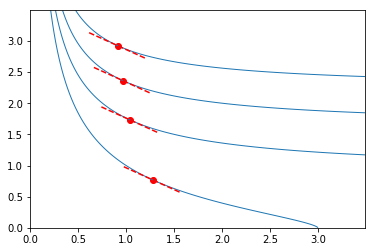

In [9]:
V3 = utl3(X1, X2, -1, 1.5)

plt.figure()
x = np.arange(1, 3, 0.5)
plt.contour(X1, X2, V3, levels = utl3(x, x, -1, 1.5), linewidths = 1, colors = 'C0', linestyles='solid')
for x_tan in x_Tans:
    plt.scatter(x_tan[0],x_tan[1], color = 'red')
    tempx = np.arange(x_tan[0]-0.3, x_tan[0] + 0.3, 0.01)
    tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
    plt.plot(tempx, tempy, linestyle = 'dashed', color = 'r')